<a href="https://colab.research.google.com/github/aarupach/Aaru/blob/main/Data_cleaning_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [ ]:
print("="*80)
print("TASK 2: TITANIC DATASET - DATA CLEANING & FEATURE ENGINEERING")
print("="*80)

TASK 2: TITANIC DATASET - DATA CLEANING & FEATURE ENGINEERING


In [ ]:
print("\n" + "="*80)
print("STEP 1: LOADING THE TITANIC DATASET")
print("="*80)


STEP 1: LOADING THE TITANIC DATASET


In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [ ]:
print(f"\nDataset Shape: {df.shape}")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")


Dataset Shape: (891, 12)
Total Rows: 891
Total Columns: 12


In [ ]:
# Display first few rows
print("\n" + "-"*80)
print("First 5 Rows of Dataset:")
print("-"*80)
print(df.head())


--------------------------------------------------------------------------------
First 5 Rows of Dataset:
--------------------------------------------------------------------------------
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599

In [ ]:
# Display column information
print("\n" + "-"*80)
print("Dataset Columns:")
print("-"*80)
print(f"Columns: {list(df.columns)}")


--------------------------------------------------------------------------------
Dataset Columns:
--------------------------------------------------------------------------------
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
# Display data types and info
print("\n" + "-"*80)
print("Dataset Information:")
print("-"*80)
df.info()


--------------------------------------------------------------------------------
Dataset Information:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Statistical summary
print("\n" + "-"*80)
print("Statistical Summary:")
print("-"*80)
print(df.describe())


--------------------------------------------------------------------------------
Statistical Summary:
--------------------------------------------------------------------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.91

In [ ]:
# Check data types
print("\n" + "-"*80)
print("Data Types:")
print("-"*80)
print(df.dtypes)


--------------------------------------------------------------------------------
Data Types:
--------------------------------------------------------------------------------
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
print("\n" + "="*80)
print("STEP 2: IDENTIFYING MISSING OR INCONSISTENT DATA")
print("="*80)


STEP 2: IDENTIFYING MISSING OR INCONSISTENT DATA


In [ ]:
# Missing values analysis
print("\n" + "-"*80)
print("Missing Values Analysis:")
print("-"*80)



--------------------------------------------------------------------------------
Missing Values Analysis:
--------------------------------------------------------------------------------


In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

In [ ]:
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

In [ ]:
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
    print(f"\nTotal missing values: {missing_values.sum()}")
else:
    print("No missing values found!")

  Column  Missing_Count  Missing_Percentage
   Cabin            687           77.104377
     Age            177           19.865320
Embarked              2            0.224467

Total missing values: 866


In [ ]:
# Check for duplicates
print("\n" + "-"*80)
print("Duplicate Records Check:")
print("-"*80)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print("⚠️ Duplicates found and will be removed during cleaning")
else:
    print("✓ No duplicate rows found")



--------------------------------------------------------------------------------
Duplicate Records Check:
--------------------------------------------------------------------------------
Number of duplicate rows: 0
✓ No duplicate rows found



➤ Creating missing data visualizations...


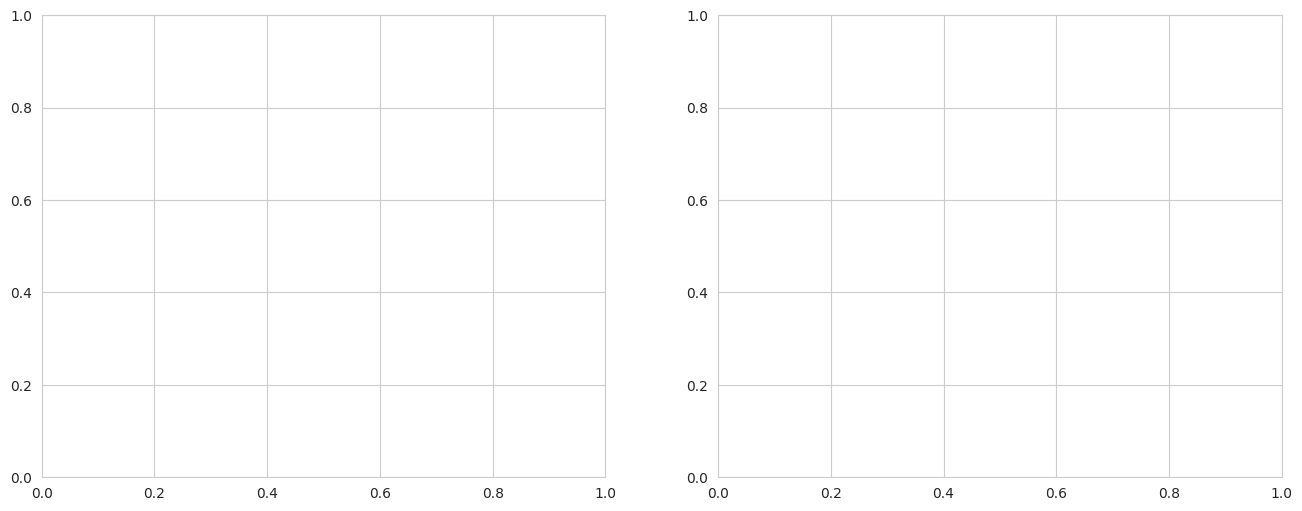

In [ ]:
# Visualize missing data
print("\n➤ Creating missing data visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


In [ ]:
# Plot 1: Missing values bar chart
ax1 = axes[0]
if len(missing_df) > 0:
    missing_df.plot(x='Column', y='Missing_Count', kind='barh', ax=ax1,
                    legend=False, color='coral', edgecolor='black')
    ax1.set_xlabel('Missing Count', fontsize=12)
    ax1.set_ylabel('Column', fontsize=12)
    ax1.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
else:
    ax1.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=16)
    ax1.set_title('Missing Values by Column', fontsize=14, fontweight='bold')

In [ ]:
# Plot 2: Missing values heatmap
ax2 = axes[1]
if missing_values.sum() > 0:
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=ax2)
    ax2.set_title('Missing Values Heatmap', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Columns', fontsize=12)
else:
    ax2.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=16)
    ax2.set_title('Missing Values Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('task2_missing_values.png', dpi=300, bbox_inches='tight')
print("✓ Missing data visualization saved as 'task2_missing_values.png'")
plt.show()

✓ Missing data visualization saved as 'task2_missing_values.png'


<Figure size 1400x800 with 0 Axes>

In [ ]:
print("\n" + "="*80)
print("STEP 3: DATA CLEANING")
print("="*80)

# Create a copy for cleaning
df_cleaned = df.copy()
print(f"\nOriginal dataset shape: {df.shape}")


STEP 3: DATA CLEANING

Original dataset shape: (891, 12)


In [ ]:
# Step 1: Handle missing values
print("\n" + "-"*80)
print("Handling Missing Values:")
print("-"*80)


--------------------------------------------------------------------------------
Handling Missing Values:
--------------------------------------------------------------------------------


In [ ]:
# Drop 'deck' column (too many missing values)
if 'deck' in df_cleaned.columns:
    print("1. Dropping 'deck' column (77.5% missing values)")
    df_cleaned = df_cleaned.drop('deck', axis=1)

In [ ]:
# Fill 'age' with median grouped by passenger class
print("2. Filling 'Age' missing values with median by passenger class")
df_cleaned['Age'] = df_cleaned.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

2. Filling 'Age' missing values with median by passenger class


In [ ]:
# Fill 'Embarked' with mode
print("3. Filling 'Embarked' missing values with mode")
if 'Embarked' in df_cleaned.columns and df_cleaned['Embarked'].isnull().sum() > 0:
    embarked_missing_before = df_cleaned['Embarked'].isnull().sum()
    df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)
    embarked_missing_after = df_cleaned['Embarked'].isnull().sum()
    print(f"   ✓ Embarked missing values: {embarked_missing_before} → {embarked_missing_after}")
else:
    print("   ✓ No missing values in 'Embarked' column")

3. Filling 'Embarked' missing values with mode
   ✓ Embarked missing values: 2 → 0


/tmp/ipython-input-2690008836.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)


In [ ]:
# Fill 'embark_town' with mode
if 'embark_town' in df_cleaned.columns and df_cleaned['embark_town'].isnull().sum() > 0:
    print("4. Filling 'embark_town' missing values with mode")
    df_cleaned['embark_town'].fillna(df_cleaned['embark_town'].mode()[0], inplace=True)


In [ ]:
# Remove duplicates
print("\n" + "-"*80)
print("Removing Duplicates:")
print("-"*80)
df_cleaned = df_cleaned.drop_duplicates()
print("Duplicates removed (if any)")


--------------------------------------------------------------------------------
Removing Duplicates:
--------------------------------------------------------------------------------
Duplicates removed (if any)


In [ ]:
print("\n" + "-"*80)
print("Dropping Remaining Rows with Missing Values:")
print("-"*80)
rows_before = len(df_cleaned)
df_cleaned = df_cleaned.dropna()
rows_after = len(df_cleaned)
print(f"Rows: {rows_before} -> {rows_after} (removed {rows_before - rows_after} rows)")


--------------------------------------------------------------------------------
Dropping Remaining Rows with Missing Values:
--------------------------------------------------------------------------------
Rows: 891 -> 204 (removed 687 rows)


In [ ]:
# Correct data types
print("\n" + "-"*80)
print("Correcting Data Types:")
print("-"*80)
df_cleaned['Survived'] = df_cleaned['Survived'].astype(int)
df_cleaned['Pclass'] = df_cleaned['Pclass'].astype(int)
print("Data types corrected")


--------------------------------------------------------------------------------
Correcting Data Types:
--------------------------------------------------------------------------------
Data types corrected


In [ ]:
print(f"\nData cleaning completed!")
print(f"Final dataset shape: {df_cleaned.shape}")
print(f"Missing values remaining: {df_cleaned.isnull().sum().sum()}")


Data cleaning completed!
Final dataset shape: (204, 12)
Missing values remaining: 0


In [ ]:
#Freature engineering
print("\n" + "="*80)
print("STEP 4: FEATURE ENGINEERING")
print("="*80)

print("\n" + "-"*80)
print("Creating New Features:")
print("-"*80)


STEP 4: FEATURE ENGINEERING

--------------------------------------------------------------------------------
Creating New Features:
--------------------------------------------------------------------------------


In [ ]:
# Feature 1: Family Size
print("1. Creating 'family_size' feature (SibSp + Parch + 1)")
df_cleaned['family_size'] = df_cleaned['SibSp'] + df_cleaned['Parch'] + 1

1. Creating 'family_size' feature (SibSp + Parch + 1)


In [ ]:
# Feature 2: Is Alone
print("2. Creating 'is_alone' feature (1 if traveling alone)")
df_cleaned['is_alone'] = (df_cleaned['family_size'] == 1).astype(int)

2. Creating 'is_alone' feature (1 if traveling alone)


In [ ]:
# Feature 3: Age Groups
print("3. Creating 'age_group' feature (Child, Teen, Adult, Senior)")
df_cleaned['age_group'] = pd.cut(df_cleaned['Age'],
                                  bins=[0, 12, 18, 60, 100],
                                  labels=['Child', 'Teen', 'Adult', 'Senior'])

3. Creating 'age_group' feature (Child, Teen, Adult, Senior)


In [ ]:
# Feature 4: Fare per Person
print("4. Creating 'fare_per_person' feature")
df_cleaned['fare_per_person'] = df_cleaned['Fare'] / df_cleaned['family_size']

4. Creating 'fare_per_person' feature


In [ ]:
# Feature 5: Title Extraction
print("5. Extracting 'title' from name")
df_cleaned['title'] = df_cleaned['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

5. Extracting 'title' from name


In [ ]:
# Simplify titles
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare', 'Mlle': 'Miss',
    'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare', 'Jonkheer': 'Rare',
    'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs', 'Capt': 'Rare', 'Sir': 'Rare'
}
df_cleaned['title'] = df_cleaned['title'].map(title_mapping)
df_cleaned['title'].fillna('Rare', inplace=True)

/tmp/ipython-input-1746361139.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['title'].fillna('Rare', inplace=True)


In [ ]:
# Feature 6: Cabin Availability
print("6. Creating 'has_cabin' feature")
# Use the original 'Cabin' column from df to create the feature
df_cleaned['has_cabin'] = df['Cabin'].notna().astype(int)

6. Creating 'has_cabin' feature


In [ ]:
print("\nFeature engineering completed!")
print("Total new features created: 6")


Feature engineering completed!
Total new features created: 6


In [ ]:
# Display sample of new features
print("\n" + "-"*80)
print("Sample of New Features:")
print("-"*80)
new_features = ['family_size', 'is_alone', 'age_group', 'fare_per_person', 'title', 'has_cabin']
print(df_cleaned[new_features].head(10))


--------------------------------------------------------------------------------
Sample of New Features:
--------------------------------------------------------------------------------
    family_size  is_alone age_group  fare_per_person title  has_cabin
1             2         0     Adult        35.641650   Mrs          1
3             2         0     Adult        26.550000   Mrs          1
6             1         1     Adult        51.862500    Mr          1
10            3         0     Child         5.566667  Miss          1
11            1         1     Adult        26.550000  Miss          1
21            1         1     Adult        13.000000    Mr          1
23            1         1     Adult        35.500000    Mr          1
27            6         0     Adult        43.833333    Mr          1
31            2         0     Adult        73.260400   Mrs          1
52            2         0     Adult        38.364600   Mrs          1


In [ ]:
print("\n" + "="*80)
print("STEP 5: CONVERTING CATEGORICAL FEATURES TO NUMERICAL")
print("="*80)


STEP 5: CONVERTING CATEGORICAL FEATURES TO NUMERICAL


In [ ]:
# Create a copy for encoding
df_encoded = df_cleaned.copy()

In [ ]:
print("\n" + "-"*80)
print("Encoding Categorical Variables:")
print("-"*80)


--------------------------------------------------------------------------------
Encoding Categorical Variables:
--------------------------------------------------------------------------------


In [ ]:
# Binary encoding for 'Sex'
print("1. Binary encoding for 'Sex' (male=1, female=0)")
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 1, 'female': 0})

1. Binary encoding for 'Sex' (male=1, female=0)


In [ ]:
# One-hot encoding for 'Embarked'
print("2. One-hot encoding for 'Embarked'")
df_encoded = pd.get_dummies(df_encoded, columns=['Embarked'], prefix='Embarked', drop_first=True)

2. One-hot encoding for 'Embarked'


In [ ]:
# Label encoding for 'title'
print("3. Label encoding for 'title'")
le_title = LabelEncoder()
df_encoded['title_encoded'] = le_title.fit_transform(df_encoded['title'])


3. Label encoding for 'title'


In [ ]:
# One-hot encoding for 'age_group'
print("4. One-hot encoding for 'age_group'")
df_encoded = pd.get_dummies(df_encoded, columns=['age_group'], prefix='age_group', drop_first=True)

print("\nAll categorical variables encoded!")

4. One-hot encoding for 'age_group'

All categorical variables encoded!


In [ ]:
print("\n" + "="*80)
print("STEP 6: FEATURE SCALING OR NORMALIZATION")
print("="*80)

print("\n" + "-"*80)
print("Applying StandardScaler to Numerical Features:")
print("-"*80)

# Select numerical features for scaling
numerical_cols = ['Age', 'Fare', 'fare_per_person']

print(f"Features to scale: {numerical_cols}")

# Apply StandardScaler
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("Feature scaling completed using StandardScaler")


STEP 6: FEATURE SCALING OR NORMALIZATION

--------------------------------------------------------------------------------
Applying StandardScaler to Numerical Features:
--------------------------------------------------------------------------------
Features to scale: ['Age', 'Fare', 'fare_per_person']
Feature scaling completed using StandardScaler


In [ ]:
print("\n" + "="*80)
print("STEP 7: FEATURE SELECTION FOR MODELING")
print("="*80)
# Select relevant features for machine learning
features_for_modeling = [
    'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
    'family_size', 'is_alone', 'fare_per_person', 'has_cabin',
    'title_encoded'
]

# Add one-hot encoded columns
for col in df_encoded.columns:
    if col.startswith('Embarked_') or col.startswith('age_group_'):
        features_for_modeling.append(col)

X = df_encoded[features_for_modeling]
y = df_encoded['Survived']

print(f"\nTotal features selected: {len(features_for_modeling)}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

print(f"\nTarget distribution:")
print(y.value_counts())


STEP 7: FEATURE SELECTION FOR MODELING

Total features selected: 16
Feature matrix shape: (204, 16)
Target variable shape: (204,)

Target distribution:
Survived
1    136
0     68
Name: count, dtype: int64



STEP 8: EXPLORATORY DATA ANALYSIS

Generating EDA visualizations...


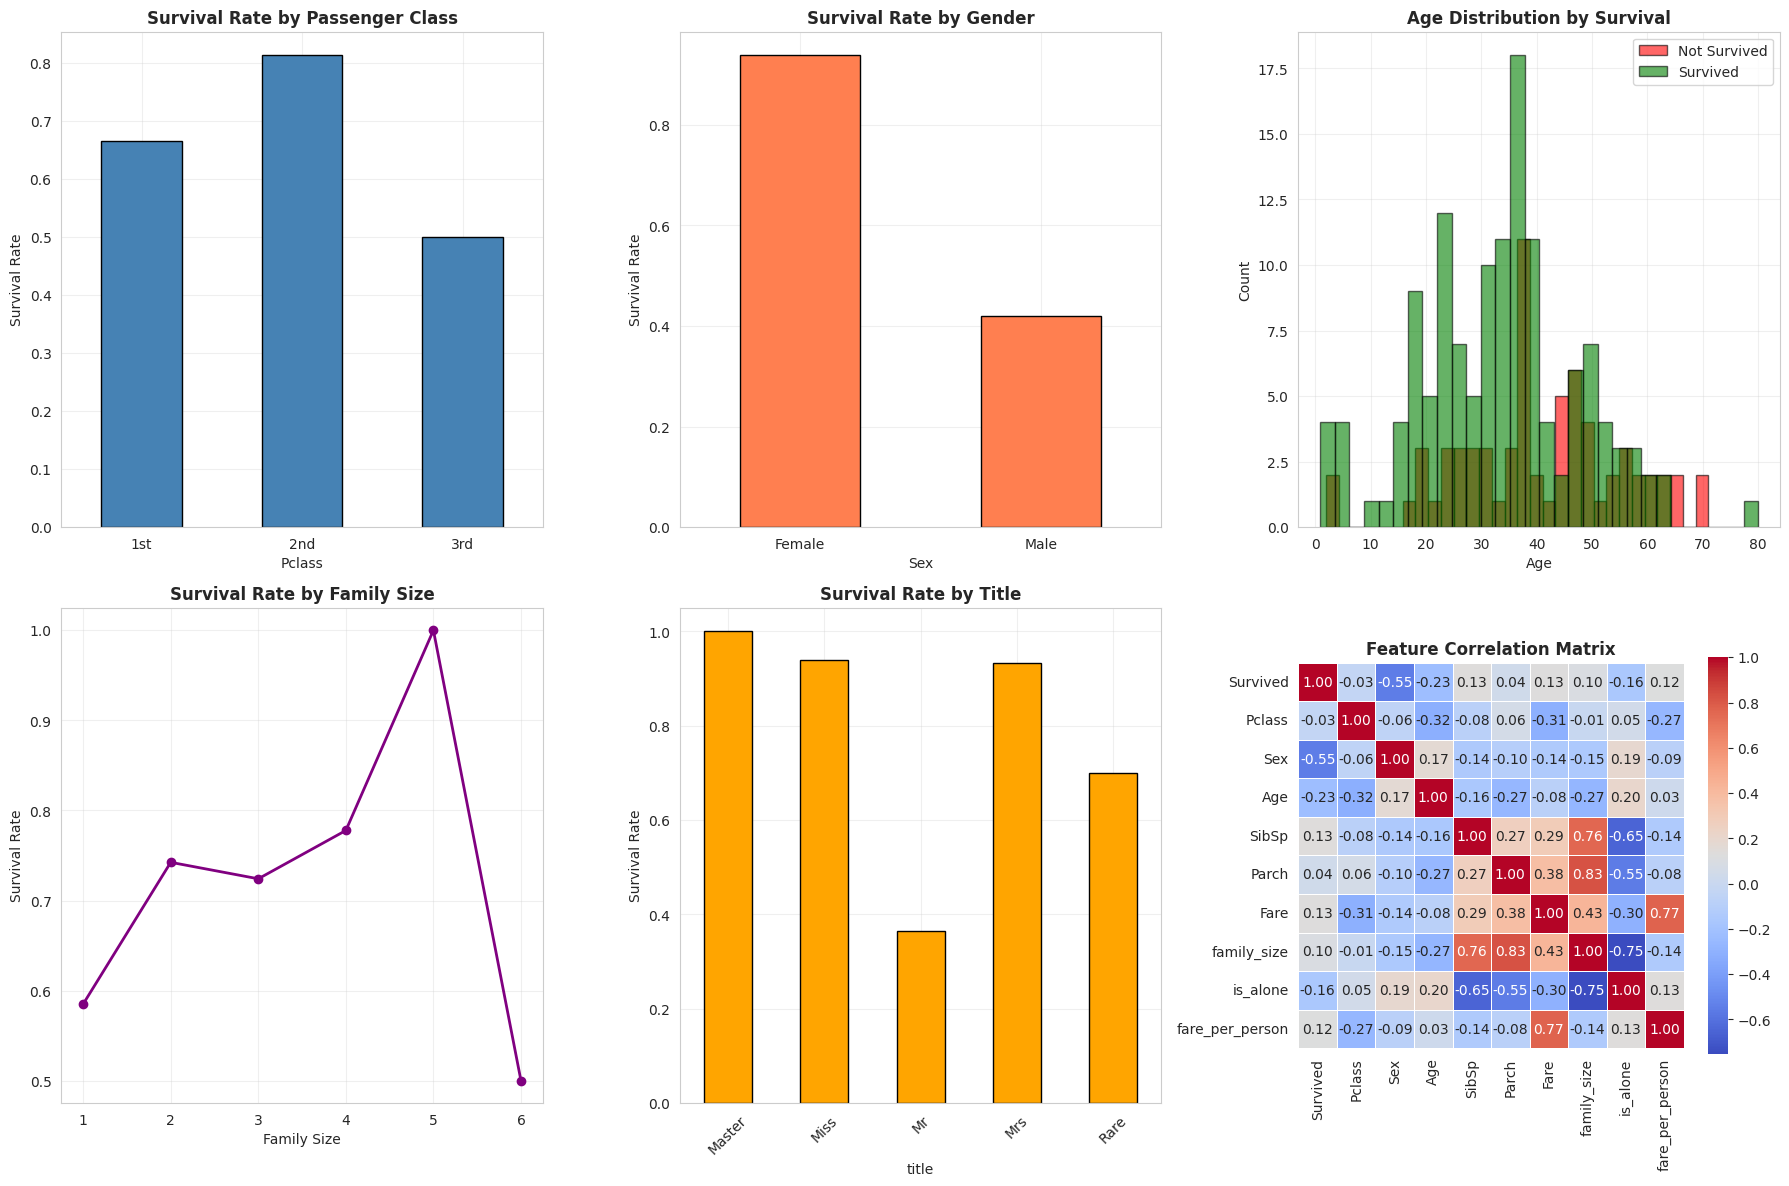

In [ ]:
print("\n" + "="*80)
print("STEP 8: EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\nGenerating EDA visualizations...")

# Create EDA visualizations
fig = plt.figure(figsize=(18, 12))

# 1. Survival rate by class
ax1 = plt.subplot(2, 3, 1)
df_cleaned.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Survival Rate by Passenger Class', fontweight='bold')
ax1.set_ylabel('Survival Rate')
ax1.set_xticklabels(['1st', '2nd', '3rd'], rotation=0)
ax1.grid(True, alpha=0.3)

# 2. Survival rate by sex
ax2 = plt.subplot(2, 3, 2)
df_cleaned.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=ax2, color='coral', edgecolor='black')
ax2.set_title('Survival Rate by Gender', fontweight='bold')
ax2.set_ylabel('Survival Rate')
ax2.set_xticklabels(['Female', 'Male'], rotation=0)
ax2.grid(True, alpha=0.3)

# 3. Age distribution by survival
ax3 = plt.subplot(2, 3, 3)
df_cleaned[df_cleaned['Survived']==0]['Age'].hist(bins=30, ax=ax3, alpha=0.6, label='Not Survived', color='red', edgecolor='black')
df_cleaned[df_cleaned['Survived']==1]['Age'].hist(bins=30, ax=ax3, alpha=0.6, label='Survived', color='green', edgecolor='black')
ax3.set_title('Age Distribution by Survival', fontweight='bold')
ax3.set_xlabel('Age')
ax3.set_ylabel('Count')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Survival by family size
ax4 = plt.subplot(2, 3, 4)
df_cleaned.groupby('family_size')['Survived'].mean().plot(kind='line', ax=ax4, marker='o', color='purple', linewidth=2)
ax4.set_title('Survival Rate by Family Size', fontweight='bold')
ax4.set_xlabel('Family Size')
ax4.set_ylabel('Survival Rate')
ax4.grid(True, alpha=0.3)

# 5. Survival by title
ax5 = plt.subplot(2, 3, 5)
df_cleaned.groupby('title')['Survived'].mean().plot(kind='bar', ax=ax5, color='orange', edgecolor='black')
ax5.set_title('Survival Rate by Title', fontweight='bold')
ax5.set_ylabel('Survival Rate')
ax5.tick_params(axis='x', rotation=45)
ax5.grid(True, alpha=0.3)

# 6. Correlation heatmap
ax6 = plt.subplot(2, 3, 6)
correlation_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                        'Fare', 'family_size', 'is_alone', 'fare_per_person']
corr_matrix = df_encoded[correlation_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=ax6,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
ax6.set_title('Feature Correlation Matrix', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*80)
print("STEP 9: SAVING PROCESSED DATA")
print("="*80)

# Save cleaned data
df_cleaned.to_csv('titanic_cleaned.csv', index=False)
print("Cleaned data saved to 'titanic_cleaned.csv'")

# Save encoded data
df_encoded.to_csv('titanic_encoded.csv', index=False)
print("Encoded data saved to 'titanic_encoded.csv'")

# Save feature matrix and target
X.to_csv('titanic_features.csv', index=False)
print("Feature matrix saved to 'titanic_features.csv'")

y.to_csv('titanic_target.csv', index=False)
print("Target variable saved to 'titanic_target.csv'")


STEP 9: SAVING PROCESSED DATA
Cleaned data saved to 'titanic_cleaned.csv'
Encoded data saved to 'titanic_encoded.csv'
Feature matrix saved to 'titanic_features.csv'
Target variable saved to 'titanic_target.csv'


In [ ]:
print("\n" + "="*80)
print("PROJECT COMPLETION SUMMARY")
print("="*80)


PROJECT COMPLETION SUMMARY
